# COVID-DATA

### 1) Lectura del archivo 

Se lee la infomacion del archivo "200511COVID19MEXICO.csv" en la carpeta "covid-data"y se guarda la informacion.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./covid-data/200511COVID19MEXICO.csv')
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-11,07f569,2,3,27,2,27,27,4,1,...,1,2,2,2,1,1,99,México,99,97
1,2020-05-11,0b0e89,2,3,25,2,25,25,6,2,...,2,2,2,1,2,1,99,México,99,2
2,2020-05-11,0ecd46,2,3,27,1,27,27,4,1,...,2,2,2,2,2,1,99,México,99,97
3,2020-05-11,12eb62,2,3,25,1,25,25,6,2,...,2,2,2,2,2,1,99,México,99,2
4,2020-05-11,032c9a,2,3,25,2,25,25,6,2,...,2,2,2,2,2,1,99,México,99,2


a) Reviso la estructura de los datos y si el archivo contiene datos nulos.

In [2]:
df.dtypes

FECHA_ACTUALIZACION    object
ID_REGISTRO            object
ORIGEN                  int64
SECTOR                  int64
ENTIDAD_UM              int64
SEXO                    int64
ENTIDAD_NAC             int64
ENTIDAD_RES             int64
MUNICIPIO_RES           int64
TIPO_PACIENTE           int64
FECHA_INGRESO          object
FECHA_SINTOMAS         object
FECHA_DEF              object
INTUBADO                int64
NEUMONIA                int64
EDAD                    int64
NACIONALIDAD            int64
EMBARAZO                int64
HABLA_LENGUA_INDIG      int64
DIABETES                int64
EPOC                    int64
ASMA                    int64
INMUSUPR                int64
HIPERTENSION            int64
OTRA_COM                int64
CARDIOVASCULAR          int64
OBESIDAD                int64
RENAL_CRONICA           int64
TABAQUISMO              int64
OTRO_CASO               int64
RESULTADO               int64
MIGRANTE                int64
PAIS_NACIONALIDAD      object
PAIS_ORIGE

In [3]:
col_names = df.columns.tolist()

for column in col_names:
    print ("Valores nulos en <{0}>: {1}".format(column, df[column].isnull().sum()))

Valores nulos en <FECHA_ACTUALIZACION>: 0
Valores nulos en <ID_REGISTRO>: 0
Valores nulos en <ORIGEN>: 0
Valores nulos en <SECTOR>: 0
Valores nulos en <ENTIDAD_UM>: 0
Valores nulos en <SEXO>: 0
Valores nulos en <ENTIDAD_NAC>: 0
Valores nulos en <ENTIDAD_RES>: 0
Valores nulos en <MUNICIPIO_RES>: 0
Valores nulos en <TIPO_PACIENTE>: 0
Valores nulos en <FECHA_INGRESO>: 0
Valores nulos en <FECHA_SINTOMAS>: 0
Valores nulos en <FECHA_DEF>: 0
Valores nulos en <INTUBADO>: 0
Valores nulos en <NEUMONIA>: 0
Valores nulos en <EDAD>: 0
Valores nulos en <NACIONALIDAD>: 0
Valores nulos en <EMBARAZO>: 0
Valores nulos en <HABLA_LENGUA_INDIG>: 0
Valores nulos en <DIABETES>: 0
Valores nulos en <EPOC>: 0
Valores nulos en <ASMA>: 0
Valores nulos en <INMUSUPR>: 0
Valores nulos en <HIPERTENSION>: 0
Valores nulos en <OTRA_COM>: 0
Valores nulos en <CARDIOVASCULAR>: 0
Valores nulos en <OBESIDAD>: 0
Valores nulos en <RENAL_CRONICA>: 0
Valores nulos en <TABAQUISMO>: 0
Valores nulos en <OTRO_CASO>: 0
Valores nulos 

### 2- Generar una tabla con 5 columnas:

(a) Fecha

(b) Confirmados de SARS-CoV2 en Sonora por fecha usando la fecha de inicio de sintomas (no acumulados)

(c) Decesos (entre los confirmados) por fecha.

In [4]:
dfSonora=df.loc[(df['RESULTADO']== 1) & (df['ENTIDAD_UM'] == 26)]

In [5]:
dfSonoraPositivos=dfSonora[['FECHA_SINTOMAS','ENTIDAD_UM']]

In [6]:
dfSonP = dfSonoraPositivos.groupby('FECHA_SINTOMAS', as_index=False).count()
dfSonP.columns = ['FECHA', 'NUM_CONTAGIOS']

In [7]:
dfSonoraDef=dfSonora.loc[(df['FECHA_DEF']!= "9999-99-99")]

In [8]:
dfSonDef = dfSonoraDef[['ENTIDAD_UM', 'FECHA_DEF']].groupby('FECHA_DEF', as_index=False).count()
dfSonDef.columns = ['FECHA', 'NUM_DECESOS']

In [9]:
tabla1 = pd.merge(dfSonP, dfSonDef, how='outer').sort_values(by=['FECHA']).fillna(0)
tabla1

,FECHA,NUM_CONTAGIOS,NUM_DECESOS
0,2020-03-11,2,0.0
1,2020-03-12,2,0.0
2,2020-03-16,2,0.0
3,2020-03-17,4,0.0
4,2020-03-18,1,0.0
5,2020-03-19,2,0.0
6,2020-03-20,1,0.0
7,2020-03-22,2,0.0
8,2020-03-23,4,0.0
9,2020-03-24,3,0.0


### 3- Guardar la tabla como "tabla1.csv"

In [10]:
tabla1.to_csv('./Data-generada/tabla1.csv', index=False)

### 4- Generar una tabla con la cantidad de casos hospitalizados en los estado de Sonora, Chihuahua, Nuevo León y Puebla.

In [11]:
#Se filtran los registros de Sonora, Chihuahua, Nuevo León y Puebla.
#Se filtra el tipo de paciente, hospitalizado en este caso que se identifica con clave 2.
dfEstados=df.loc[((df['ENTIDAD_UM']== 26) | (df['ENTIDAD_UM']== 8) | (df['ENTIDAD_UM']== 19) | (df['ENTIDAD_UM']== 21)) & (df['TIPO_PACIENTE']==2)]
dfEstados

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
76,2020-05-11,1aad65,2,4,19,2,5,5,18,2,...,2,2,2,2,99,1,99,México,99,1
82,2020-05-11,005e84,2,4,21,2,21,21,19,2,...,2,2,2,2,99,1,99,México,99,2
218,2020-05-11,0e6058,2,4,21,2,29,21,114,2,...,2,2,2,2,99,1,99,México,99,1
224,2020-05-11,15dd82,2,4,21,1,21,21,114,2,...,2,2,2,2,99,1,99,México,99,2
247,2020-05-11,074aae,2,4,21,1,21,21,114,2,...,2,2,2,2,99,1,99,México,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134990,2020-05-11,05d28a,1,12,21,1,21,21,207,2,...,2,2,2,1,99,3,99,México,99,2
135030,2020-05-11,1a4b2d,1,12,26,2,26,26,30,2,...,2,2,2,2,1,3,99,México,99,2
135058,2020-05-11,1ad081,1,12,19,2,32,19,6,2,...,2,2,2,2,2,3,99,México,99,2
135083,2020-05-11,144280,1,12,21,2,21,21,19,2,...,2,1,2,2,2,3,99,México,99,2


In [12]:
tabla2 = dfEstados[['ENTIDAD_UM','TIPO_PACIENTE']].groupby('ENTIDAD_UM', as_index=False).count()
tabla2.columns = ['Num_Entidad', 'Casos_hospitalizados']
#Con un diccionario agregamos el nombre de la Entidad correspondiente
entidad=d = {19: 'NUEVO LEÓN', 21: 'PUEBLA', 26: 'SONORA', 8: 'CHIHUAHUA'}
tabla2['Entidad'] = tabla2['Num_Entidad'].map(entidad)
tabla2


,Num_Entidad,Casos_hospitalizados,Entidad
0,8,1013,CHIHUAHUA
1,19,1089,NUEVO LEÓN
2,21,1301,PUEBLA
3,26,549,SONORA


### 5- Guardar la tabla como tabla2.csv

In [13]:
tabla2.to_csv('./Data-generada/tabla2.csv', index=False)

###  6- Realizar dos grágicas y guardarlas en el repositorio como grafica1.png y grafica2.png, las cuales contengan lo siguiente:

(a)  En grafica1 realizar una gráfica de barras verticales con el número
de casos hospitalizados (de acuerdo a nuestro archivo) de los estados de <b>Sonora</b>, <b>Chihuahua</b>, <b>Nuevo León</b> y <b>Puebla</b>.

(b)  En grafica2 graficar la serie de tiempo de confirmados a nivel
Nacional en el tiempo.


### a)

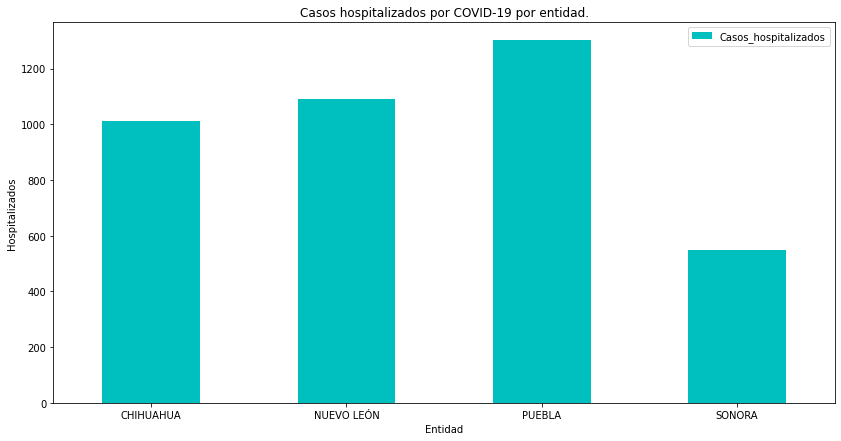

In [14]:
grafica1=tabla2.iloc[:, [1,2]].plot(x="Entidad", ylabel="Hospitalizados", kind="bar", color="c", title="Casos hospitalizados por COVID-19 por entidad.", figsize=(14, 7), rot=0).get_figure()

Guardo la grafica en la carpeta Graficas

In [15]:
grafica1.savefig('./Graficas/grafica1.png')

### b)

In [16]:
dfConfirmados=df.loc[(df['RESULTADO']== 1)]

In [17]:
dfConfirmadosCovid = dfConfirmados[['FECHA_SINTOMAS','ENTIDAD_RES']].groupby("FECHA_SINTOMAS").count()

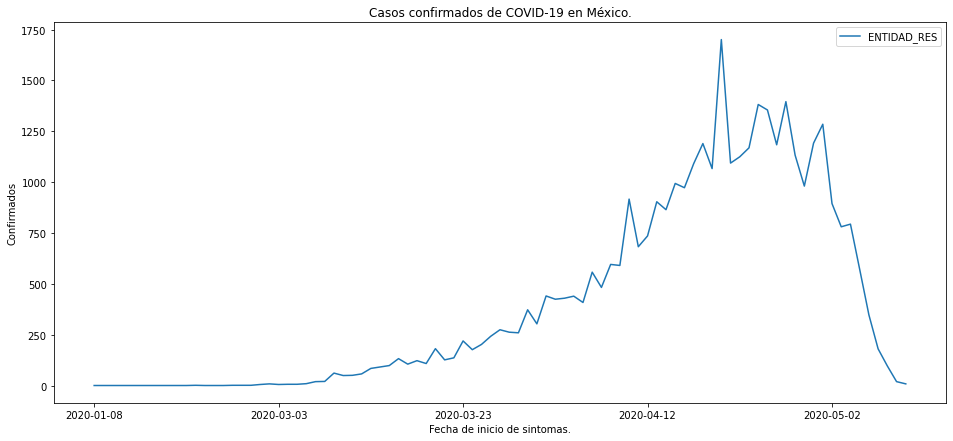

In [18]:
grafica2 = dfConfirmadosCovid.plot(ylabel="Confirmados", xlabel="Fecha de inicio de sintomas.", title="Casos confirmados de COVID-19 en México.", figsize=(16,7)).get_figure()

Guardo la grafica en la carpeta Graficas

In [19]:
grafica2.savefig('./Graficas/grafica2.png')